#  Regresion: Inversión en una tienda de videojuegos

1. Preparación de Datos
2. División de los datos
3. Aprendizaje del Modelo
4. Evaluación del Modelo
5. Guardamos el modelo

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   videojuego                 152 non-null    object
 1   Edad                       152 non-null    int64 
 2   Sexo                       152 non-null    object
 3   Plataforma                 152 non-null    object
 4   Consumidor_habitual        152 non-null    bool  
 5   Presupuesto para invertir  152 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 6.2+ KB


In [ ]:
#Descripción de variables numéricas
data.describe()

,Edad,Presupuesto para invertir
count,152.000000,152.000000
mean,28.000000,343.289474
std,9.990724,291.945464
min,14.000000,20.000000
25%,21.000000,100.000000
50%,26.000000,275.000000
75%,34.000000,420.000000
max,52.000000,1200.000000


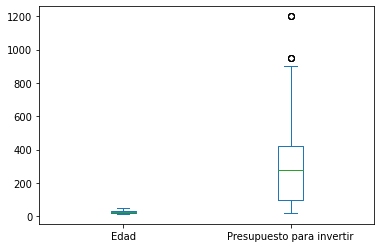

In [ ]:
data.plot(kind='box')

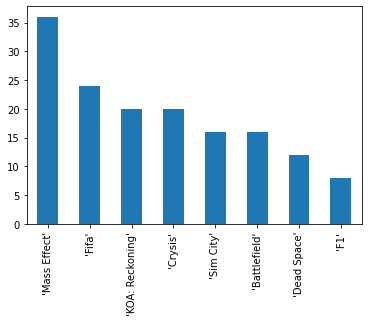

In [ ]:
#Descripción variables categóricas
data['videojuego'].value_counts().plot(kind='bar')

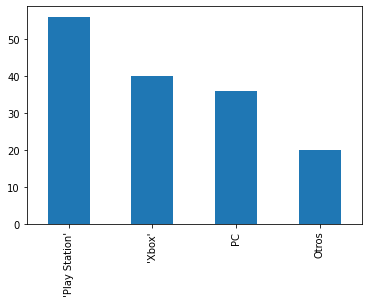

In [ ]:
data['Plataforma'].value_counts().plot(kind='bar')

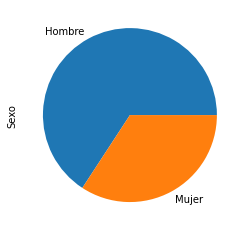

In [ ]:
data['Sexo'].value_counts().plot(kind='pie')

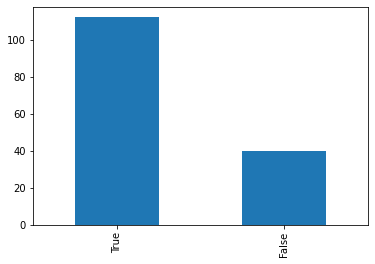

In [ ]:
data['Consumidor_habitual'].value_counts().plot(kind='bar')

In [ ]:
#Creamos variables dummy para convertir  las categorías a números
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'], drop_first=False)
data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'], drop_first=True)
data.head()

#No hay labelencoder-> Variable objetivo ya es numérica 

,Edad,Presupuesto para invertir,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,29,200,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,27,600,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,22,200,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,28,370,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,30,100,0,0,0,0,0,1,0,0,0,0,0,1,1,1


# 2. División 70-30


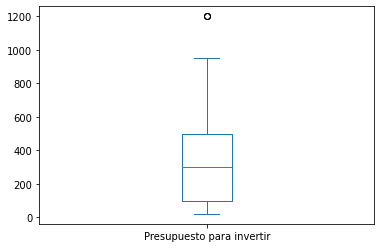

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Presupuesto para invertir", axis = 1) # Variables predictoras
Y = data['Presupuesto para invertir'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train.plot(kind='box')

# Aprendizaje  70% y Evaluación 30%

# Arbol de Regresión

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeRegressor
model_Tree = DecisionTreeRegressor(criterion='mse', min_samples_leaf=2, max_depth=None)
model_Tree.fit(X_train, Y_train)#70% entrenamiento



/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', min_samples_leaf=2)

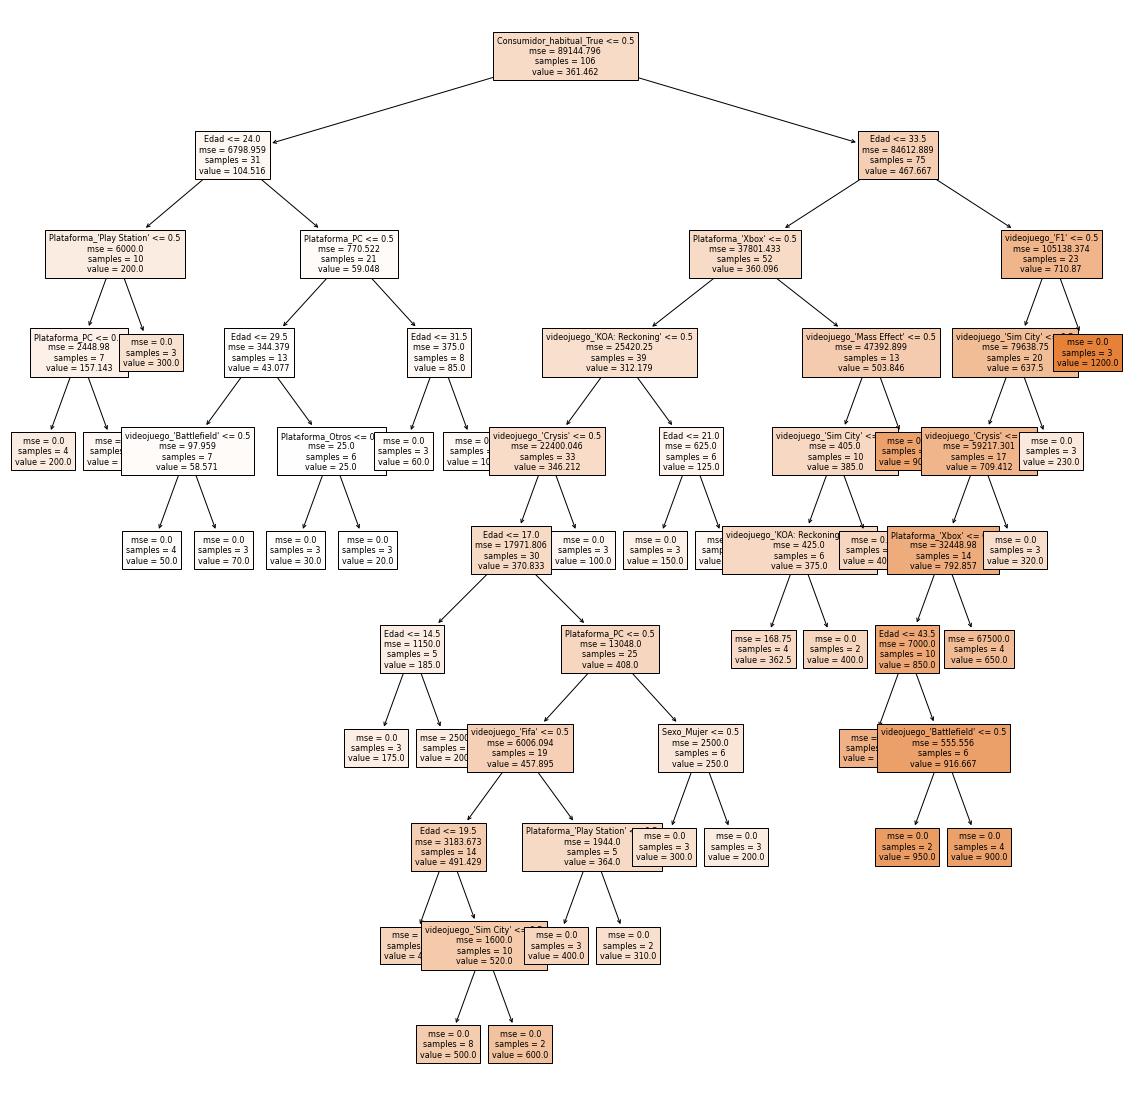

In [ ]:
#Graficar el árbol
from sklearn.tree import plot_tree
nombres_variables=X_train.columns.values
plt.figure(figsize=(20,20))
plot_tree(model_Tree, feature_names=nombres_variables, filled=True,fontsize=8)
plt.show() 

In [ ]:
#Evaluación del árbol 30%
from sklearn import metrics
Y_pred = model_Tree.predict(X_test) #30%

#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse) 
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Arbol']=[mse, rmse, mae, mape,max]
medidas

,Arbol
mse,14055.978261
rmse,118.557911
mae,40.760870
mape,0.190354
max,450.000000


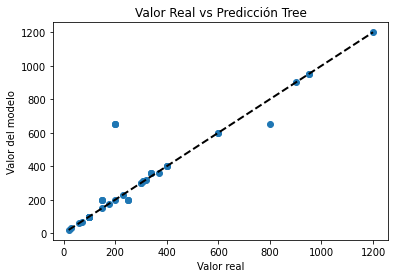

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real') 
plt.ylabel('Valor del modelo') 
plt.title('Valor Real vs Predicción Tree')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

# KNN
* Normalización de las var numéricas

In [ ]:
#Normalizacion de las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Edad']]) #Se ajustan los paramatros de normalizacion

#se aplica la normalizacion al X_train y X_test
X_train[['Edad']]= min_max_scaler.transform(X_train[['Edad']]) 
X_test[['Edad']]= min_max_scaler.transform(X_test[['Edad']]) 
X_train.head()

,Edad,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
94,0.289474,0,0,0,0,0,1,0,0,1,0,0,0,0,1
10,0.526316,0,0,0,1,0,0,0,0,1,0,0,0,0,1
99,0.078947,0,0,0,0,0,1,0,0,1,0,0,0,1,1
88,0.605263,0,0,0,0,0,0,0,1,0,0,0,1,1,0
101,0.105263,0,0,1,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
from sklearn.neighbors import  KNeighborsRegressor
model_Knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean') #minkowski
model_Knn.fit(X_train, Y_train) #70%

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

             Arbol  Knn
mse   14055.978261  0.0
rmse    118.557911  0.0
mae      40.760870  0.0
mape      0.190354  0.0
max     450.000000  0.0


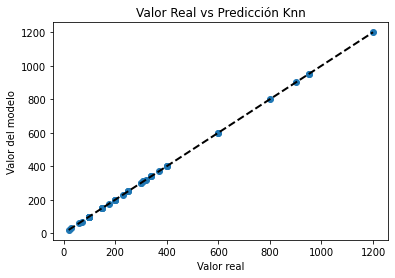

In [ ]:
#Evaluación de Knn
from sklearn import metrics

Y_pred = model_Knn.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse) 
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real') 
plt.ylabel('Valor del modelo') 
plt.title('Valor Real vs Predicción Knn')
plt.show()

# Red Neuronal

In [ ]:
from sklearn.neural_network import MLPRegressor

model_NN = MLPRegressor(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.3, momentum= 0.2, max_iter=5000,  random_state=3)

model_NN.fit(X_train, Y_train)#70%

MLPRegressor(hidden_layer_sizes=16, learning_rate_init=0.3, max_iter=5000,
             momentum=0.2, random_state=3)

             Arbol  Knn                  NN
mse   14055.978261  0.0  2101.2591351113892
rmse    118.557911  0.0           45.839493
mae      40.760870  0.0           13.463045
mape      0.190354  0.0            0.084211
max     450.000000  0.0          178.600912


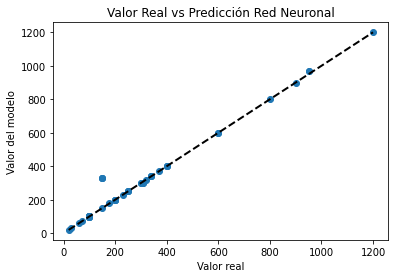

In [ ]:
#Evaluación de NN
from sklearn import metrics

Y_pred = model_NN.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse) 
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[format(mse), rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real') 
plt.ylabel('Valor del modelo') 
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

# 5. Guardamos el modelo

In [ ]:
import pickle
filename = 'modelo.pkl'
variables=X.columns._values
pickle.dump([model_Tree,model_Knn,model_NN, min_max_scaler,variables], open(filename, 'wb'))